In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("project1.ipynb")

# Project 1: World Population and Poverty

In this project, you'll explore data from [Gapminder.org](http://gapminder.org), a website dedicated to providing a fact-based view of the world and how it has changed. That site includes several data visualizations and presentations, but also publishes the raw data that we will use in this project to recreate and extend some of their most famous visualizations.

The Gapminder website collects data from many sources and compiles them into tables that describe many countries around the world. All of the data they aggregate are published in the [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/README.md). Their goal is "to compile all public statistics; Social, Economic and Environmental; into a comparable total dataset." All data sets in this project are copied directly from the Systema Globalis without any changes.

This project is dedicated to [Hans Rosling](https://en.wikipedia.org/wiki/Hans_Rosling) (1948-2017), who championed the use of data to understand and prioritize global development challenges.

### Logistics

**Deadline.**  This project is due at **11:00pm PT on Friday 2/24**. Projects will be accepted up to 2 days (48 hours) late. Projects submitted fewer than 24 hours after the deadline will receive 2/3 credit, and projects submitted between 24 and 48 hours after the deadline will receive 1/3 credit. Projects submitted 48 hours or more after the deadline will receive no credit. It's **much** better to be early than late, so start working now.

**Checkpoint.**  For full credit on the checkpoint, you must complete the questions up to the checkpoint, **pass all _public_ autograder tests** for those sections, and submit to the Gradescope Project 1 Checkpoint assignment by **11:00pm PT on Friday, 2/17**. <span style="color: #BC412B">**The checkpoint is worth 5% of your entire project grade**</span>. After you've submitted the checkpoint, you may still change your project answers before the final project deadline - only your final submission, to the "Project 1" assignment, will be graded for correctness. You will have some lab time to work on these questions, but we recommend that you start the project before lab and leave time to finish the checkpoint afterward.

**Partners.** You may work with one other partner; your partner must be from your assigned lab section. **<span style="color: #BC412B">Only one partner should submit the project notebook to Gradescope.</span> If both partners submit, you will be docked 10% of your project grade. On Gradescope, the person who submits should also designate their partner so that both of you receive credit.** Once you submit, click into your submission, and there will be an option to Add Group Member in the top right corner. You may also reference [this walkthrough video](https://drive.google.com/file/d/1POtij6KECSBjCUeOC_F0Lt3ZmKN7LKIq/view?usp=sharing) on how to add partners on Gradescope.


**Rules.** Don't share your code with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers. The experience of solving the problems in this project will prepare you for exams (and life). If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

**Support.** You are not alone! Come to office hours, post on Ed, and talk to your classmates. If you want to ask about the details of your solution to a problem, make a private Ed post and the staff will respond. If you're ever feeling overwhelmed or don't know how to make progress, email your TA or tutor for help. You can find contact information for the staff on the [course website](https://www.data8.org/sp23/).

**Tests.** <span style="color: #BC412B">The tests that are given are **not comprehensive** and passing the tests for a question **does not** mean that you answered the question correctly.</span> Tests usually only check that your table has the correct column labels. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work! You might want to create your own checks along the way to see if your answers make sense. Additionally, before you submit, make sure that none of your cells take a very long time to run (several minutes).

**Free Response Questions:** Make sure that you put the answers to the written questions in the indicated cell we provide. **Every free response question should include an explanation** that adequately answers the question.

**Tabular Thinking Guide:** Feel free to reference [Tabular Thinking Guide](https://drive.google.com/file/d/1NvbBECCBdI0Ku380oPcTUOcpjH3RI230/view) for extra guidance.

**Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. Make sure that you are using distinct and meaningful variable names throughout the notebook. Along that line, **DO NOT** reuse the variable names that we use when we grade your answers. For example, in Question 1 of the Global Poverty section we ask you to assign an answer to `latest`. Do not reassign the variable name `latest` to anything else in your notebook, otherwise there is the chance that our tests grade against what `latest` was reassigned to.

You are **never** restricted to using only one line of code to solve a question in this project or any others. Feel free to use intermediate variables and multiple lines as much as you would like!

---

To get started, load `datascience`, `numpy`, `plots`, and `otter`.

In [ ]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the NumPy and Datascience modules.
from datascience import *
import numpy as np

# These lines do some fancy plotting magic.
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## 1. Global Population Growth

The global population of humans reached 1 billion around 1800, 3 billion around 1960, and 7 billion around 2011. The potential impact of population growth has concerned scientists, economists, and politicians alike.

The United Nations Population Division estimates that the world population will likely continue to grow throughout the 21st century, but at a slower rate, perhaps reaching and stabilizing at 11 billion by 2100. However, the UN does not rule out scenarios of slower or more extreme growth. These projections help us understand long-term population processes, even if they leave out possible global catastrophic events like war or climate crises.

<a href="http://www.pewresearch.org/fact-tank/2015/06/08/scientists-more-worried-than-public-about-worlds-growing-population/ft_15-06-04_popcount/"> 
 <img src="pew_population_projection.png"/> 
</a>

In this part of the project, we will examine some of the factors that influence population growth and how they have been changing over the years and around the world. There are two main sub-parts of this analysis.

- First, we will examine the data for one country, Poland. We will see how factors such as life expectancy, fertility rate, and child mortality have changed over time in Poland, and how they are related to the rate of population growth.
- Next, we will examine whether the changes we have observed for Poland are particular to that country or whether they reflect general patterns observable in other countries too. We will study aspects of world population growth and see how they have been changing.

The first table we will consider contains the total population of each country over time. Run the cell below.

In [ ]:
population = Table.read_table('population.csv').where("time", are.below(2021))
population.show(3)

**Note:** The population csv file can also be found [here](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv).

### Poland

The Central European nation of Poland has undergone many changes over the centuries. In modern times it was (re)created as a democratic republic in 1919 after World War I. It was invaded and divided in World War II between Germany and the Soviet Union. War and the Holocaust had a devastating impact on its people. Poland was constituted in its current borders at the end of World War II (1945) under a communist government. In 1989, with the fall of the Soviet Union, Poland re-established itself as a democratic republic.

In this section of the project, we will examine aspects of the population of Poland since 1900. Poland's borders have changed, so we will look at the population within its current (2012) borders.

In the `population` table, the `geo` column contains three-letter codes established by the [International Organization for Standardization](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard. **Use the Alpha-3 link to find the 3-letter code for Poland.**

**Question 1.** Create a table called `p_pop` that has two columns labeled `time` and `population_total`. The first column should contain the years from 1900 through 2020 (including both 1900 and 2020) and the second should contain the population of Poland in each of those years.

<!--
BEGIN QUESTION
name: q1_1
points:
- 0
- 0
- 0
- 4
-->

In [ ]:
p_pop = population.where('geo', 'pol').where('time', are.between_or_equal_to(1900, 2020)).drop('geo')
p_pop

In [ ]:
grader.check("q1_1")

Run the following cell to create a table called `p_five` that has the population of Poland every five years.

In [ ]:
p_pop.set_format('population_total', NumberFormatter)

fives = np.arange(1900, 2021, 5) # 1900, 1905, 1910, ...
p_five = p_pop.sort('time').where('time', are.contained_in(fives))
p_five.show(3)

Run the following cell to visualize the population over time. Following the devastating effects of World War I and World War II, Poland's population increased steadily from 1950 to 2000 and then leveled off. In the following questions we'll investigate this period of population growth.

In [ ]:
p_five.plot(0, 1)

**Question 2.** Assign `initial` to an array that contains the population for every five year interval from **1900 to 2015** (inclusive). Then, assign `changed` to an array that contains the population for every five year interval from **1905 to 2020** (inclusive). The first array should include both 1900 and 2015, and the second array should include both 1905 and 2020. You should use the `p_five` table to create both arrays, by first filtering the table to only contain the relevant years.

The annual growth rate for a time period is equal to:

$$\left(\left(\frac{\text{Population at end of period}}{\text{Population at start of period}}\right)^{\displaystyle\frac{1}{\text{number of years}}}\right) -1$$

We have provided the code below that uses  `initial` and `changed` in order to add a column to `p_five` called `annual_growth`. **Don't worry about the calculation of the growth rates**; run the test below to test your solution.

If you are interested in how we came up with the formula for growth rates, consult the [growth rates](https://inferentialthinking.com/chapters/03/2/1/Growth.html) section of the textbook.

<!--
BEGIN QUESTION
name: q1_2
points:
- 0
- 0
- 0
- 0
- 0
- 4
-->

In [ ]:
initial = p_five.where('time', are.contained_in(np.arange(1900, 2020, 5))).column('population_total')
changed = p_five.where('time', are.contained_in(np.arange(1905, 2025, 5))).column('population_total')

p_1900_through_2015 = p_five.where('time', are.below_or_equal_to(2015)) 
p_five_growth = p_1900_through_2015.with_column('annual_growth', (changed/initial)**0.2-1)
p_five_growth.set_format('annual_growth', PercentFormatter)

In [ ]:
grader.check("q1_2")

The annual growth rate in Poland has been declining since 1950, as shown in the table below. 

In [ ]:
# Run this cell to view annual growth rates in Poland since 1950.
p_five_growth.where('time', are.above_or_equal_to(1950)).show()

Next, we'll try to understand what has changed in Poland that might explain the slowing population growth rate. Run the next cell to load three additional tables of measurements about countries over time.

In [ ]:
life_expectancy = Table.read_table('life_expectancy.csv').where('time', are.below(2021))
child_mortality = Table.read_table('child_mortality.csv').relabel(2, 'child_mortality_under_5_per_1000_born').where('time', are.below(2021))
fertility = Table.read_table('fertility.csv').where('time', are.below(2021))

The `life_expectancy` table contains a statistic that is often used to measure how long people live, called *life expectancy at birth*. This number, for a country in a given year, [does not measure how long babies born in that year are expected to live](http://blogs.worldbank.org/opendata/what-does-life-expectancy-birth-really-mean). Instead, it measures how long someone would live, on average, if the *mortality conditions* in that year persisted throughout their lifetime. These "mortality conditions" describe what fraction of people at each age survived the year. So, it is a way of measuring the proportion of people that are staying alive, aggregated over different age groups in the population.

Run the following cells below to see `life_expectancy`, `child_mortality`, and `fertility`. Refer back to these tables as they will be helpful for answering further questions!

In [ ]:
life_expectancy.show(3)

In [ ]:
child_mortality.show(3)

In [41]:
fertility.show(3)

geo,time,children_per_woman_total_fertility
abw,1800,5.64
abw,1801,5.64
abw,1802,5.64


<!-- BEGIN QUESTION -->

**Question 3.** Is population growing more slowly perhaps because people aren’t living as long? Use the `life_expectancy` table to draw a line graph with the years 1950 and later on the horizontal axis that shows how the *life expectancy at birth* has changed in Poland.

*Hint*: Make sure you filter the table properly; otherwise, the graph may look funky!

<!--
BEGIN QUESTION
name: q1_3
manual: True
-->

In [ ]:
# Fill in code here

life_expectancy.where('geo', 'pol').where(1, are.above_or_equal_to(1950)).plot(1, 2)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.** Assuming everything else stays the same, do the trends in life expectancy in the graph above directly explain why the population growth rate decreased since 1950 in Poland? Why or why not?

<!--
BEGIN QUESTION
name: q1_4
manual: True
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->



The `fertility` table contains a statistic that is often used to measure how many babies are being born, the *total fertility rate*. This number describes the [number of children a woman would have in her lifetime](https://www.measureevaluation.org/prh/rh_indicators/specific/fertility/total-fertility-rate), on average, if the current rates of birth by age of the mother persisted throughout her child bearing years, assuming she survived through age 49. 

**Question 5.** Complete the function `fertility_over_time`. It takes the Alpha-3 code of a country as `country_code` and a `start` year. It returns a two-column table with labels `Year` and `Children per woman` with one row per year starting with (and including) the `start` year and including all later years in the `fertility` table.

Then, set `poland_code` to the Alpha-3 code for Poland. The provided call `fertility_over_time(poland_code, 1950)` returns a table that shows Poland's annual fertility rates since 1950. 

*Hint*: Read about `tbl.relabeled` in the [Python Reference](https://www.data8.org/sp23/reference/) to rename columns.

<!--
BEGIN QUESTION
name: q1_5
points:
- 0
- 0
- 0
- 0
- 0
- 4
-->

In [ ]:
def fertility_over_time(country_code, start):
    """Create a two-column table that describes a country's total fertility rate each year."""
    # It's a good idea (but not required) to use multiple lines in your solution.
    return fertility.where('geo', country_code).where('time', are.above_or_equal_to(start)).drop('geo').relabeled('time', 'Year').relabeled('children_per_woman_total_fertility', 'Children per woman')


poland_code = 'pol'
fertility_over_time(poland_code, 1950)

In [ ]:
grader.check("q1_5")

Plotting the fertility rate in Poland since 1950, we see a downward trend.

In [ ]:
fertility_over_time(poland_code, 1950).plot(0, 1)

<!-- BEGIN QUESTION -->

**Question 6.** Assuming everything else is constant, do the trends in fertility in the graph above help directly explain why the population growth rate decreased from 1950 to 2020 in Poland? Why or why not?

<!--
BEGIN QUESTION
name: q1_6
manual: True
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->



It has been [observed](https://www.ageing.ox.ac.uk/download/143) that lower fertility rates are often associated with lower child mortality rates. We can see if this association is evident in Poland by plotting the relationship between total fertility rate and [child mortality rate per 1000 children](https://en.wikipedia.org/wiki/Child_mortality).

**Question 7.** Create a table `poland_since_1950` that contains one row per year starting with 1950 and:
- A column `Year` containing the year
- A column `Children per woman` describing total fertility in Poland that year
- A column `Child deaths per 1000 born` describing child mortality in Poland that year

<!--
BEGIN QUESTION
name: q1_7
manual: false
points:
- 0
- 0
- 0
- 0
- 0
- 0
- 0
- 4
-->

In [46]:
pol_fertility = fertility_over_time(poland_code, 1950)  # Try starting with the table you built already!
# It's a good idea (but not required) to use multiple lines in your solution.
death_arr = child_mortality.where('geo', 'pol').where(1, are.above_or_equal_to(1950)).column(2)
poland_since_1950 = pol_fertility.with_column('Child deaths per 1000 born', death_arr)
poland_since_1950

Year,Children per woman,Child deaths per 1000 born
1950,3.6,164.08
1951,3.62,177.18
1952,3.64,140.16
1953,3.65,127.65
1954,3.64,118.9
1955,3.6,110.38
1956,3.55,94.19
1957,3.47,86.72
1958,3.37,81.28
1959,3.25,72.1


In [47]:
grader.check("q1_7")

q1_7 results: All test cases passed!

Run the following cell to generate a scatter plot from the `poland_since_1950` table you created.

The plot uses **color** to encode data about the `Year` column. The colors, ranging from dark blue to white, represent the passing of time between 1950 and 2020. For example, a point on the scatter plot representing data from the 1950s would appear as **dark blue** and a point from the 2010s would appear as **light blue**.


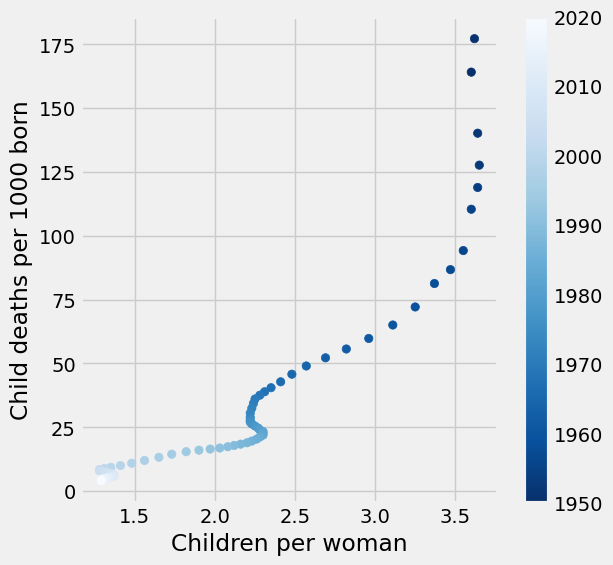

In [48]:
x_births = poland_since_1950.column("Children per woman")
y_deaths = poland_since_1950.column("Child deaths per 1000 born")
time_colors = poland_since_1950.column("Year")

plots.figure(figsize=(6,6))
plots.scatter(x_births, y_deaths, c=time_colors, cmap="Blues_r")
plots.colorbar()                  
plots.xlabel("Children per woman")
plots.ylabel("Child deaths per 1000 born");

<!-- BEGIN QUESTION -->

**Question 8.** In one or two sentences, describe the association (if any) that is illustrated by this scatter plot. Does the diagram show any causal relation between between fertility and child mortality?

<!--
BEGIN QUESTION
name: q1_8
manual: True
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->



*Optional food for thought*: What other context or information you would need in order to better understand the factors affecting life expectancy, child mortality, and fertility?

### Checkpoint (due Friday 2/17 by 11:00 PM PT)

<img src="harvey.png" alt="Close-up photo of a golden retriever looking at the camera" width="300"/>

**WOOOHOO!!!** Harvey wants to congratulate you on reaching the checkpoint!

**Run the following cells and submit to the Gradescope assignment corresponding to the checkpoint: <u>Project 1 Checkpoint</u>**

**<span style="color: #BC412B">Remember to add your project partner to your submission on Gradescope!</span>** <u>Only one partner should submit to Gradescope.</u>

--- 

To double check your work, the cell below will rerun all of the autograder tests for Section 1. 

In [49]:
checkpoint_tests = ["q1_1", "q1_2", "q1_5", "q1_7"]
for test in checkpoint_tests:
    display(grader.check(test))

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_5 results: All test cases passed!

q1_7 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)

### The World

The changes observed in Poland can also be observed in many other countries: except during periods of extended war, famine, and social chaos, health services generally improve, life expectancy increases, and child mortality decreases. At the same time, the fertility rate often plummets, and where it does, the population growth rate decreases despite increasing longevity.

Run the cell below to generate two overlaid histograms, one for 1962 and one for 2010, that show the distributions of total fertility rates for these two years among all 201 countries in the `fertility` table.

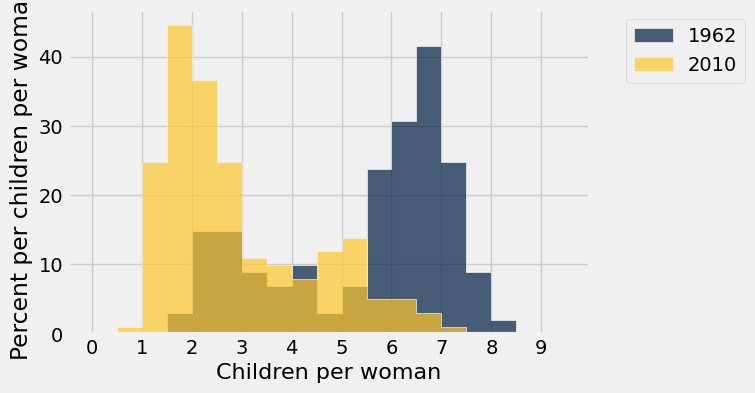

In [52]:
Table().with_columns(
    '1962', fertility.where('time', 1962).column(2),
    '2010', fertility.where('time', 2010).column(2)
).hist(bins=np.arange(0, 10, 0.5), unit='child per woman')
_ = plots.xlabel('Children per woman')
_ = plots.ylabel('Percent per children per woman')
_ = plots.xticks(np.arange(10))

**Question 9.** Assign `fertility_statements` to an **array** of the numbers of each statement below that can be correctly inferred from these histograms.

1. About the same number of countries had a fertility rate between 3.5 and 4.5 in both 1962 and 2010.
1. In 1962, less than 20% of countries had a fertility rate below 3.
1. At least half of countries had a fertility rate between 5 and 8 in 1962.
1. In 2010, about 40% of countries had a fertility rate between 1.5 and 2.
1. At least half of countries had a fertility rate below 3 in 2010.
1. More countries had a fertility rate above 3 in 1962 than in 2010.

<!--
BEGIN QUESTION
name: q1_9
points:
- 0
- 4
-->

In [53]:
fertility_statements = make_array(1, 2, 3, 5, 6)

In [54]:
grader.check("q1_9")

q1_9 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 10.** Draw a line plot of the **world population** from 1800 through 2020 (inclusive of both endpoints). The world population is the sum of all of the countries' populations. You should use the `population` table defined earlier in the project. 

<!--
BEGIN QUESTION
name: q1_10
manual: True
-->

发现问题，全球人数超过int上限

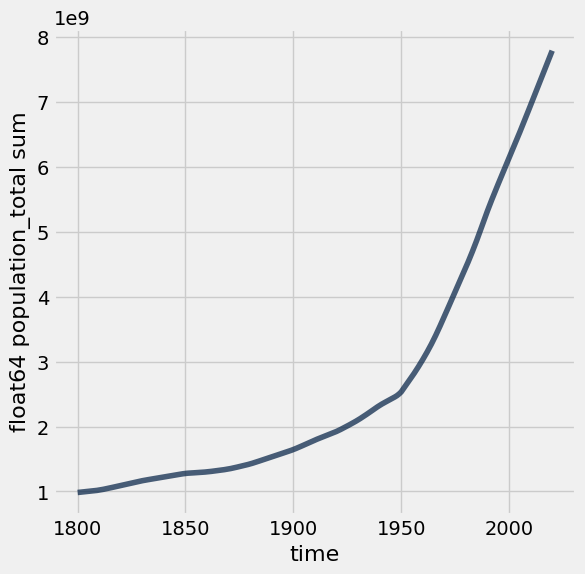

In [105]:
#Fill in code here
population = population.with_column('float64 population_total', population.column('population_total').astype('float64'))
population_country = population.where('time', are.between_or_equal_to(1800, 2020)).drop('geo', 'population_total').group('time', sum)
population_country.plot(0, 1)

<!-- END QUESTION -->

**Question 11.** Create a function `stats_for_year` that takes a `year` and returns a table of statistics. The table it returns should have four columns: `geo`, `population_total`, `children_per_woman_total_fertility`, and `child_mortality_under_5_per_1000_born`. Each row should contain one unique Alpha-3 country code and three statistics: population, fertility rate, and child mortality for that `year` from the `population`, `fertility` and `child_mortality` tables. Only include rows for which all three statistics are available for the country and year.

In addition, restrict the result to country codes that appears in `big_50`, an array of the 50 most populous countries in 2020. This restriction will speed up computations later in the project.

After you write `stats_for_year`, try calling `stats_for_year` on any year between 1960 and 2020. Try to understand the output of stats_for_year.

*Hint*: The tests for this question are quite comprehensive, so if you pass the tests, your function is probably correct. However, without calling your function yourself and looking at the output, it will be very difficult to understand any problems you have, so try your best to write the function correctly and check that it works before you rely on the `grader` tests to confirm your work.

*Hint*: What do all three tables have in common (pay attention to column names)?

<!--
BEGIN QUESTION
name: q1_11
manual: false
points:
- 0
- 0
- 0
- 4
-->

In [ ]:
# We first create a population table that only includes the 
# 50 countries with the largest 2020 populations. We focus on 
# these 50 countries only so that plotting later will run faster.
big_50 = population.where('time', are.equal_to(2020)).sort("population_total", descending=True).take(np.arange(50)).column('geo')
population_of_big_50 = population.where('time', are.above(1959)).where('geo', are.contained_in(big_50))

def stats_for_year(year):
    """Return a table of the stats for each country that year."""
    p = population_of_big_50.where('time', are.equal_to(year)).drop('time')
    f = fertility.where('time', are.equal_to(year)).drop('time')
    c = child_mortality.where('time', are.equal_to(year)).drop('time')
    ...

...

In [ ]:
grader.check("q1_11")

**Question 12.** Create a table called `pop_by_decade` with two columns called `decade` and `population`, in this order. It has a row for each year that starts a decade, in increasing order starting with 1960 and ending with 2020. For example, 1960 is the start of the 1960's decade. The `population` column contains the total population of all countries included in the result of `stats_for_year(year)` for the first `year` of the decade. You should see that these countries contain most of the world's population.

*Hint:* One approach is to define a function `pop_for_year` that computes this total population, then `apply` it to the `decade` column.  **Think about how you can use the `stats_for_year` function** from the previous question if you want to implement `pop_for_year`.

This first test is just a sanity check for your helper function if you choose to use it. **You will not lose points for not implementing the function `pop_for_year`**.

**Note:** The cell where you will generate the `pop_by_decade` table is below the cell where you can choose to define the helper function `pop_for_year`. You should define your `pop_by_decade` table in the cell that starts with the table `decades` being defined. 

<!--
BEGIN QUESTION
name: q1_12_0
manual: false
points: 
- 0
- 0
- 0
- 0
-->

In [ ]:
def pop_for_year(year):
    """Return the total population for the specified year."""
    ...

In [ ]:
grader.check("q1_12_0")

Now that you've defined your helper function (if you've chosen to do so), define the `pop_by_decade` table.

<!--
BEGIN QUESTION
name: q1_12
manual: false
points:
- 0
- 0
- 0
- 0
- 0
- 0
- 4
-->

In [ ]:
decades = Table().with_column('decade', np.arange(1960, 2021, 10))

pop_by_decade = ...
pop_by_decade.set_format(1, NumberFormatter)

In [ ]:
grader.check("q1_12")

The `countries` table describes various characteristics of countries. The `country` column contains the same codes as the `geo` column in each of the other data tables (`population`, `fertility`, and `child_mortality`). The `world_6region` column classifies each country into a region of the world. Run the cell below to inspect the data.

In [ ]:
countries = Table.read_table('countries.csv').where('country', are.contained_in(population.group('geo').column('geo')))
countries.select('country', 'name', 'world_6region')

**Question 13.** Create a table called `region_counts`. It should contain two columns called `region` and `count`. The `region` column should contain regions of the world, and the `count` column should contain the number of countries in each region that appears in the result of `stats_for_year(2020)`. 

For example, one row would have `south_asia` as its `region` value and an integer as its `count` value: the number of large South Asian countries for which we have population, fertility, and child mortality numbers from 2020.

*Hint*: You may have to relabel a column to name it `region`. 

<!--
BEGIN QUESTION
name: q1_13
points:
- 0
- 0
- 0
- 4
-->

In [ ]:
stats_for_2020 = ...
region_counts = ...
region_counts

In [ ]:
grader.check("q1_13")

The following scatter diagram compares total fertility rate and child mortality rate for each country in 1960. The area of each dot represents the population of the country, and the color represents its region of the world. Run the cell. Do you think you can identify any of the dots?

In [ ]:
from functools import lru_cache as cache

# This cache annotation makes sure that if the same year
# is passed as an argument twice, the work of computing
# the result is only carried out once.
@cache(None)
def stats_relabeled(year):
    """Relabeled and cached version of stats_for_year."""
    return stats_for_year(year).relabel(2, 'Children per woman').relabel(3, 'Child deaths per 1000 born')

def fertility_vs_child_mortality(year):
    """Draw a color scatter diagram comparing child mortality and fertility."""
    with_region = stats_relabeled(year).join('geo', countries.select('country', 'world_6region'), 'country')
    with_region.scatter(2, 3, sizes=1, group=4, s=500)
    plots.xlim(0,10)
    plots.ylim(-50, 500)
    plots.title(year)
    plots.show()

fertility_vs_child_mortality(1960)

**Question 14.** Assign `scatter_statements` to an array of the numbers of each statement below that can be inferred from this scatter diagram for 1960. 
1. All countries in `europe_central_asia` had uniformly low fertility rates.
1. The lowest child mortality rate of any country was from an `east_asia_pacific` country.
1. Most countries had a fertility rate above 5.
1. There was an association between child mortality and fertility.
1. The two largest countries by population also had the two highest child mortality rates.

<!--
BEGIN QUESTION
name: q1_14
points:
- 0
- 4
-->

In [ ]:
scatter_statements = ...

In [ ]:
grader.check("q1_14")

The result of the cell below is interactive. Drag the slider to the right to see how countries have changed over time. You’ll find that in terms of population growth, the divide between the countries of the global North and global South that existed in the 1960s has shrunk significantly. 

This shift in fertility rates is the reason that the global population is expected to grow more slowly in the 21st century than it did in the 19th and 20th centuries. Fertility rates change for reasons that include cultural patterns, better prospects for children surviving to adulthood, and family planning (such as contraception and women’s greater control over their reproduction).

**Note:** Don't worry if a red warning pops up when running the cell below. You'll still be able to run the cell!

In [ ]:
_ = widgets.interact(fertility_vs_child_mortality, 
                     year=widgets.IntSlider(min=1960, max=2020, value=1960))

Now is a great time to take a break and watch the same data presented by [Hans Rosling in a 2010 TEDx talk](https://www.gapminder.org/videos/reducing-child-mortality-a-moral-and-environmental-imperative) with smoother animation and witty commentary.

When we look at population and fertility as data scientists, we need to learn about the experiences of people in real life, not just abstractly as data. We should also recognize that population studies have sometimes had political undercurrents. Those undercurrents have included population control, control of women’s reproduction, or fears of shifts between racial groups. To do better as data scientists, we should check our assumptions to avoid unthinkingly reproducing past patterns.

## 2. Global Poverty

In [ ]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In 1800, 85% of the world's 1 billion people lived in [extreme poverty](https://en.wikipedia.org/wiki/Extreme_poverty), defined by the United Nations as "a condition characterized by severe deprivation of basic human needs, including food, safe drinking water, sanitation facilities, health, shelter, education and information." At the time when the data in this project were gathered, a common definition of extreme poverty was a person living on less than \$1.25 a day.

In 2018, the proportion of people living in extreme poverty was estimated to be [about 9\%](https://unstats.un.org/sdgs/report/2019/goal-01/). Although the world rate of extreme poverty has declined consistently for hundreds of years, the number of people living in extreme poverty is still over 600 million. The United Nations adopted an [ambitious goal](http://www.un.org/sustainabledevelopment/poverty/): "By 2030, eradicate extreme poverty for all people everywhere."

In this part of the project, we will examine some aspects of global poverty that might affect whether the goal is achievable. The causes of poverty are complex. They include global histories, such as colonialism, as well as factors such as health care, economics, and social inequality in each country.

First, load the population and poverty rate by country and year and the country descriptions. While the `population` table has values for every recent year for many countries, the `poverty` table only includes certain years for each country in which a measurement of the rate of extreme poverty was available.

In [ ]:
population = Table.read_table('population.csv')
countries = Table.read_table('countries.csv').where('country', are.contained_in(population.group('geo').column('geo')))
poverty = Table.read_table('poverty.csv')
poverty.show(3)

**Question 1.** Assign `latest_poverty` to a three-column table with one row for each country that appears in the `poverty` table. The first column should contain the 3-letter code for the country. The second column should contain the most recent year for which an extreme poverty rate is available for the country. The third column should contain the poverty rate in that year. **Do not change the last line, so that the labels of your table are set correctly.**

*Hint*: think about how ```group``` works: it does a sequential search of the table (from top to bottom) and collects values in the array in the order in which they appear, and then applies a function to that array. The `first` function may be helpful, but you are not required to use it.

<!--
BEGIN QUESTION
name: q2_1
points:
- 0
- 0
- 4
-->

In [ ]:
def first(values):
    return values.item(0)

latest_poverty = ...
latest_poverty = latest_poverty.relabeled(0, 'geo').relabeled(1, 'time').relabeled(2, 'poverty_percent') # You should *not* change this line.
latest_poverty

In [ ]:
grader.check("q2_1")

**Question 2.** Using both `latest_poverty` and `population`, create a four-column table called `recent_poverty_total` with one row for each country in `latest_poverty`. The four columns should have the following labels and contents:
1. `geo` contains the 3-letter country code,
1. `poverty_percent` contains the most recent poverty percent,
1. `population_total` contains the population of the country in 2010,
1. `poverty_total` contains the number of people in poverty **rounded to the nearest integer**, based on the 2010 population and most recent poverty rate.

*Hint*: You are not required to use `poverty_and_pop`, and you are always welcome to add any additional names. 
<!--
BEGIN QUESTION
name: q2_2
points:
- 0
- 0
- 0
- 4
-->

In [ ]:
poverty_and_pop = ...
recent_poverty_total = ...
recent_poverty_total

In [ ]:
grader.check("q2_2")

**Question 3.** Assign the name `poverty_percent` to the known percentage of the world’s 2010 population that were living in extreme poverty. Assume that the `poverty_total` numbers in the `recent_poverty_total` table describe **all** people in 2010 living in extreme poverty. You should get a number that is above the 2018 global estimate of 9%, since many country-specific poverty rates are older than 2018.

*Hint*: The sum of the `population_total` column in the `recent_poverty_total` table is not the world population, because only a subset of the world's countries are included in the `recent_poverty_total` table (only some countries have known poverty rates). Use the `population` table to compute the world's 2010 total population.

*Hint*: We are computing a percentage (value between 0 and 100), not a proportion (value between 0 and 1).

<!--
BEGIN QUESTION
name: q2_3
points:
- 0
- 4
-->

In [ ]:
poverty_percent = ...
poverty_percent

In [ ]:
grader.check("q2_3")

The `countries` table includes not only the name and region of countries, but also their positions on the globe.

In [ ]:
countries.select('country', 'name', 'world_4region', 'latitude', 'longitude')

**Question 4.** Using both `countries` and `recent_poverty_total`, create a five-column table called `poverty_map` with one row for every country in `recent_poverty_total`.  The five columns should have the following labels and contents, in this order:
1. `latitude` contains the country's latitude,
1. `longitude` contains the country's longitude,
1. `name` contains the country's name,
1. `region` contains the country's region from the `world_4region` column of `countries`,
1. `poverty_total` contains the country's poverty total.

<!--
BEGIN QUESTION
name: q2_4
points:
- 0
- 0
- 0
- 6
-->

In [ ]:
poverty_map = ...
poverty_map

In [ ]:
grader.check("q2_4")

Run the cell below to draw a map of the world in which the areas of circles represent the number of people living in extreme poverty. Double-click on the map to zoom in.

In [ ]:
# It may take a few seconds to generate this map.
colors = {'africa': 'blue', 'europe': 'black', 'asia': 'red', 'americas': 'green'}
scaled = poverty_map.with_columns(
    'labels', poverty_map.column('name'),
    'colors', poverty_map.apply(colors.get, 'region'),
    'areas', 1e-4 * poverty_map.column('poverty_total')
).drop('name', 'region', 'poverty_total')

Circle.map_table(scaled)

Although people lived in extreme poverty throughout the world in 2010 (with more than 5 million in the United States), the largest numbers were in Asia and Africa.

**Question 5.** Assign `largest` to a two-column table with the `name` (not the 3-letter code) and `poverty_total` of the 10 countries with the largest number of people living in extreme poverty.

*Hint*: How can we use `take` and `np.arange` in conjunction with each other?

<!--
BEGIN QUESTION
name: q2_5
points:
- 0
- 0
- 0
- 6
-->

In [ ]:
largest = ...
largest.set_format('poverty_total', NumberFormatter)

In [ ]:
grader.check("q2_5")

<!-- BEGIN QUESTION -->

**Question 6.** It is important to study the absolute number of people living in poverty, not just the percent. The absolute number is an important factor in determining the amount of resources needed to support people living in poverty. In the next two questions you will explore this.

In Question 7, you will be asked to write a function called `poverty_timeline` that takes **the name of a country** as its argument  (not the Alpha-3 country code). It should draw a line plot of the number of people living in poverty in that country with time on the horizontal axis. The line plot should have a point for each row in the `poverty` table for that country. To compute the population living in poverty from a poverty percentage, multiply by the population of the country **in that year**.

For this question, write out a generalized process for Question 7. What should this function output, and what steps will you take within the function?

<!--
BEGIN QUESTION
name: q2_6
manual: True
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->



**Question 7.** Now, we'll actually write the function called `poverty_timeline`. Recall that `poverty_timeline` takes **the name of a country** as its argument (not the Alpha-3 country code). It should draw a line plot of the number of people living in poverty in that country with time on the horizontal axis. The line plot should have a point for each row in the `poverty` table for that country. To compute the population living in poverty from a poverty percentage, multiply by the population of the country **in that year**.

**Note:** You **should <u>not</u>** return anything from your function. Simply call `plots.show()` at the end of your function body.

*Hint 1:* This question is long. Feel free to create cells and experiment. You can create cells by going to the toolbar and hitting the `+` button.

*Hint 2:* Consider using `join` in your code.

In [ ]:
def poverty_timeline(country):
    '''Draw a timeline of people living in extreme poverty in a country.'''
    geo = ...
    # This solution will take multiple lines of code. Use as many as you need
    ...
    # Don't change anything below this line. 
    plots.title(country)
    plots.ylim(bottom=0)
    plots.show() # This should be the last line of your function. 

<!-- BEGIN QUESTION -->

Finally, draw the line plots below to see how the world is changing. Pay attention to the axes!

<!--
BEGIN QUESTION
name: q2_7
manual: True
-->

In [ ]:
poverty_timeline('Poland')
poverty_timeline('India')
poverty_timeline('Nigeria')
poverty_timeline('China')
poverty_timeline('Colombia')
poverty_timeline('United States')

<!-- END QUESTION -->



Although the number of people living in extreme poverty increased in some countries including Nigeria and the United States, the decreases in other countries, most notably the massive decreases in China and India, have shaped the overall trend that extreme poverty is decreasing worldwide, both in percentage and in absolute number. 

To learn more, watch [Hans Rosling in a 2015 film](https://www.gapminder.org/videos/dont-panic-end-poverty/) about the UN goal of eradicating extreme poverty from the world. 

Below, we've also added an interactive dropdown menu for you to visualize `poverty_timeline` graphs for other countries. Note that each dropdown menu selection may take a few seconds to run.

In [ ]:
# Just run this cell

all_countries = poverty_map.column('name')
_ = widgets.interact(poverty_timeline, country=list(all_countries))



<img src="panda.jpg" alt="drawing" width="300"/>

**Panda wants to tell you, you're finished!** Congratulations on discovering many important facts about global poverty and demonstrating your mastery of table manipulation and data visualization. Time to submit.

**<span style="color: #BC412B">Remember to add your project partner to your submission on Gradescope!</span>** <u>Only one partner should submit to Gradescope.</u>

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)